# Graphs

### Connected Components

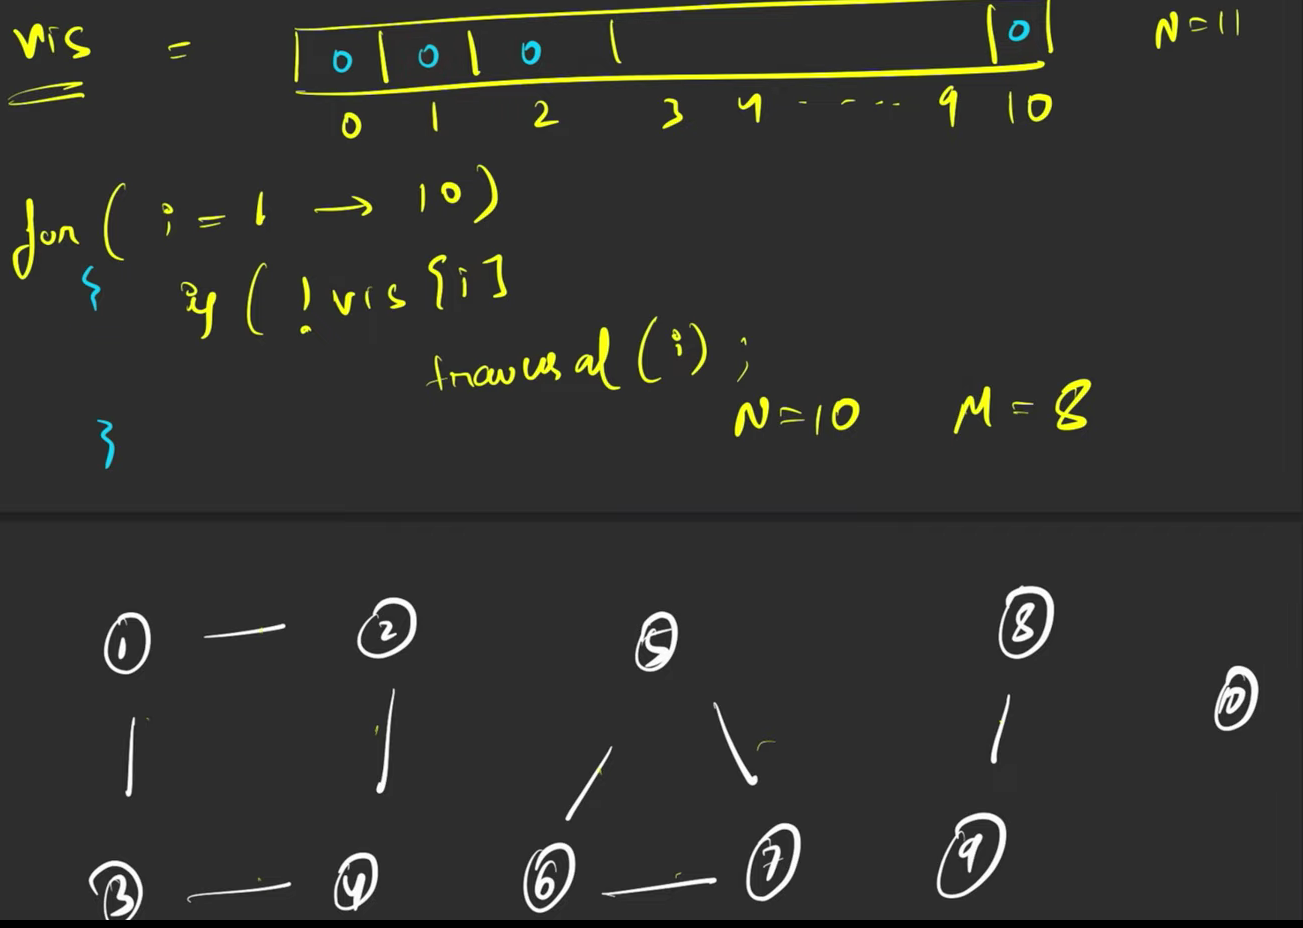

Key Points:

Connected Components Definition:

A connected component in an undirected graph is a maximal set of nodes such that there exists a path between any two nodes within this set. In simpler terms, it's a subgraph where all nodes are interconnected, and no additional nodes in the supergraph are connected to this subgraph.​

Identification Using Traversal Algorithms:

To identify all connected components in a graph, traversal algorithms like Depth-First Search (DFS) or Breadth-First Search (BFS) are employed. By initiating a traversal from an unvisited node, one can mark all reachable nodes, thereby identifying one connected component. Repeating this process for all unvisited nodes helps in discovering all connected components in the graph.​
Glasp

Role of the Visited Array:

A 'visited' array is utilized during traversal to keep track of nodes that have already been explored. This ensures that each node is processed only once, thereby preventing redundant operations and accurately counting the number of connected components.

In the figure above we can see their are 4 components of a graph which are not connected. All nodes in a component that are connected comprise the connected components. We also see the visited array and how to implement the traversal. Traversal algorithms are made so that the traverse all connected components.

In [ ]:
# No. of Connected Components  TC : O(N)+O(V+E)  SC : O(N)+O(N)
# Use DFS to visit every connected component of the graph and mark all the nodes in that component as visited.
# Count the number of times we start a DFS from an unvisited node, that will be the number of connected components.
class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        v=len(isConnected)
        vis=[0]*(v+1)
        def dfs(ele):
            if vis[ele]:
                return
            vis[ele]=1
            
            neighbours=isConnected[ele-1] # get the adjacency list from matrix
            for i in range(len(neighbours)):
                if neighbours[i] and not vis[i+1]:
                    dfs(i+1)
        cnt=0
        for i in range(1,v+1):
            if not vis[i]:  
                dfs(i)
                cnt+=1
        return cnt

### BFS

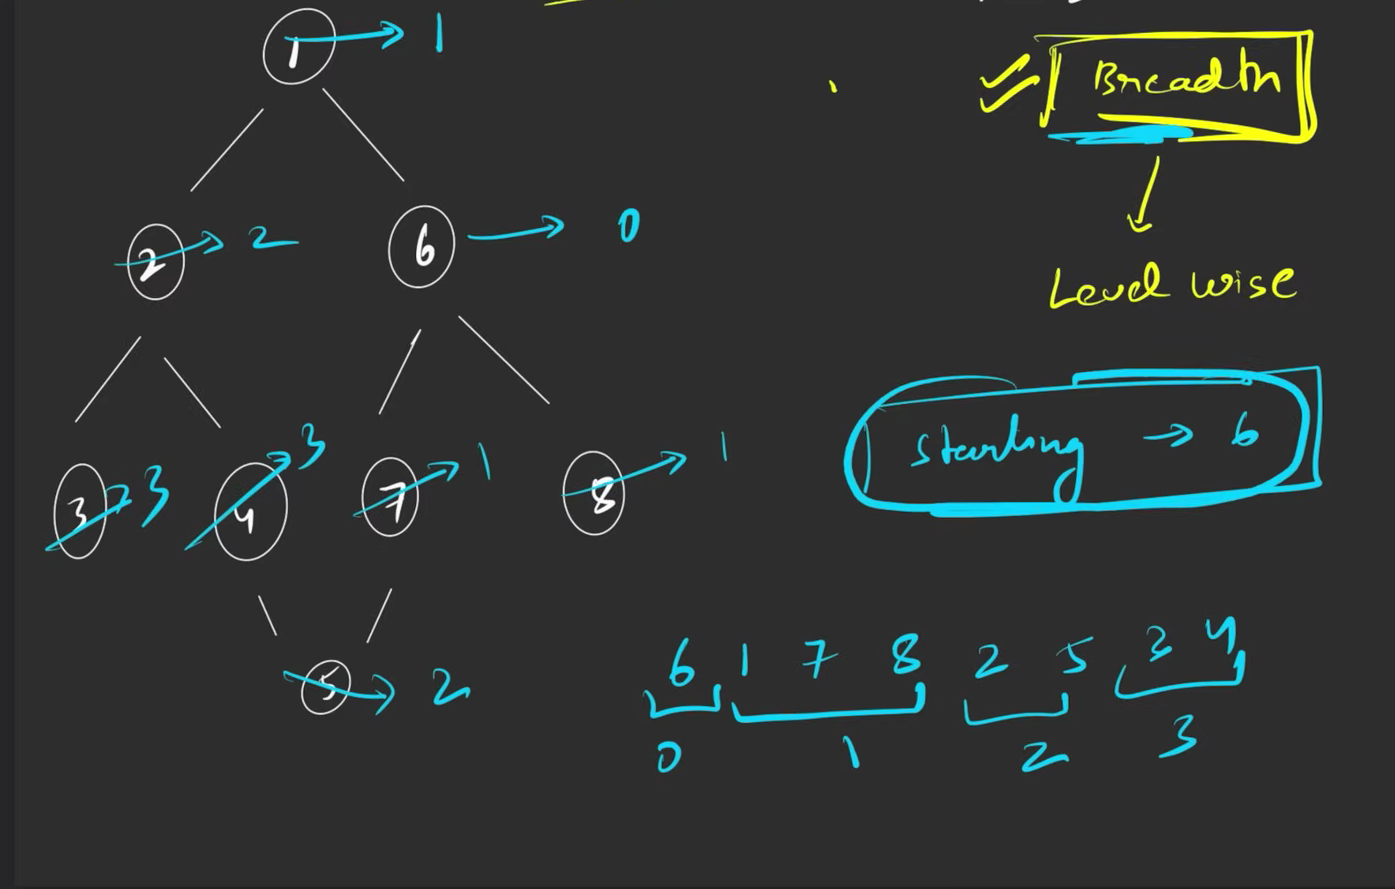

Level order Traversal if node 1 is the starting is known to us, similar to binary trees.
If the starting node is changed to say 6, all nodes equidistant from 6 at a distance of 1 will form the 2nd level, similarly at a distance of 2 will form the 3rd level

In [ ]:
# BFS Traversal of Graph

from collections import deque
from typing import List
class Solution:
    def bfs(self, adj: List[List[int]]) -> List[int]:
        # code here
        q=deque([0])
        vis=[0]*(len(adj))
        vis[0]=1
        bfs=[]
        while q:
            ele=q.popleft() # get the element and add to bfs
            bfs.append(ele)
            
            for node in adj[ele]: # iterate through all adjacent neighbours
                if vis[node]==0: # add to queue if not visited and mark as visited
                    vis[node]=1
                    q.append(node)
        return bfs

### DFS


- 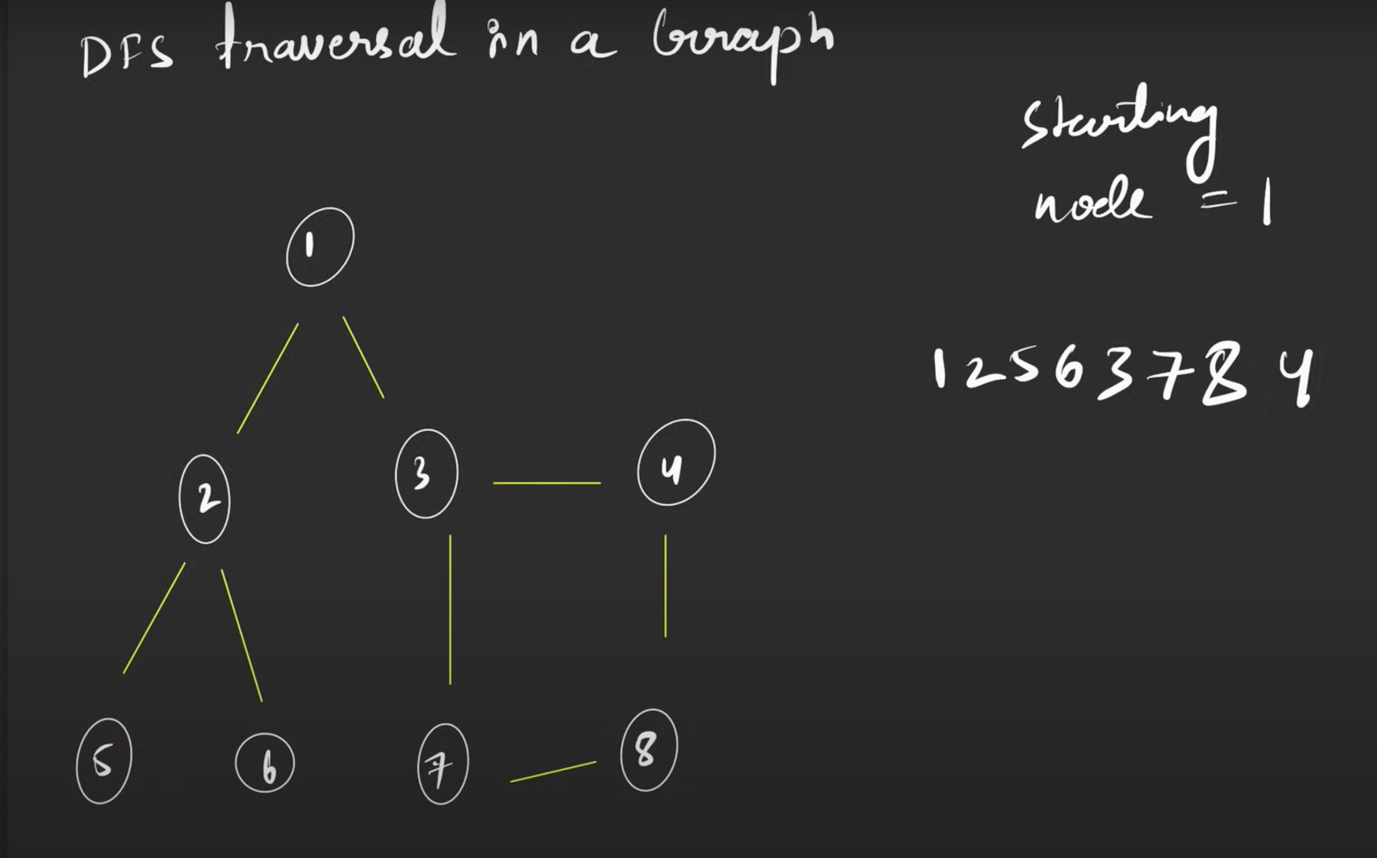
- 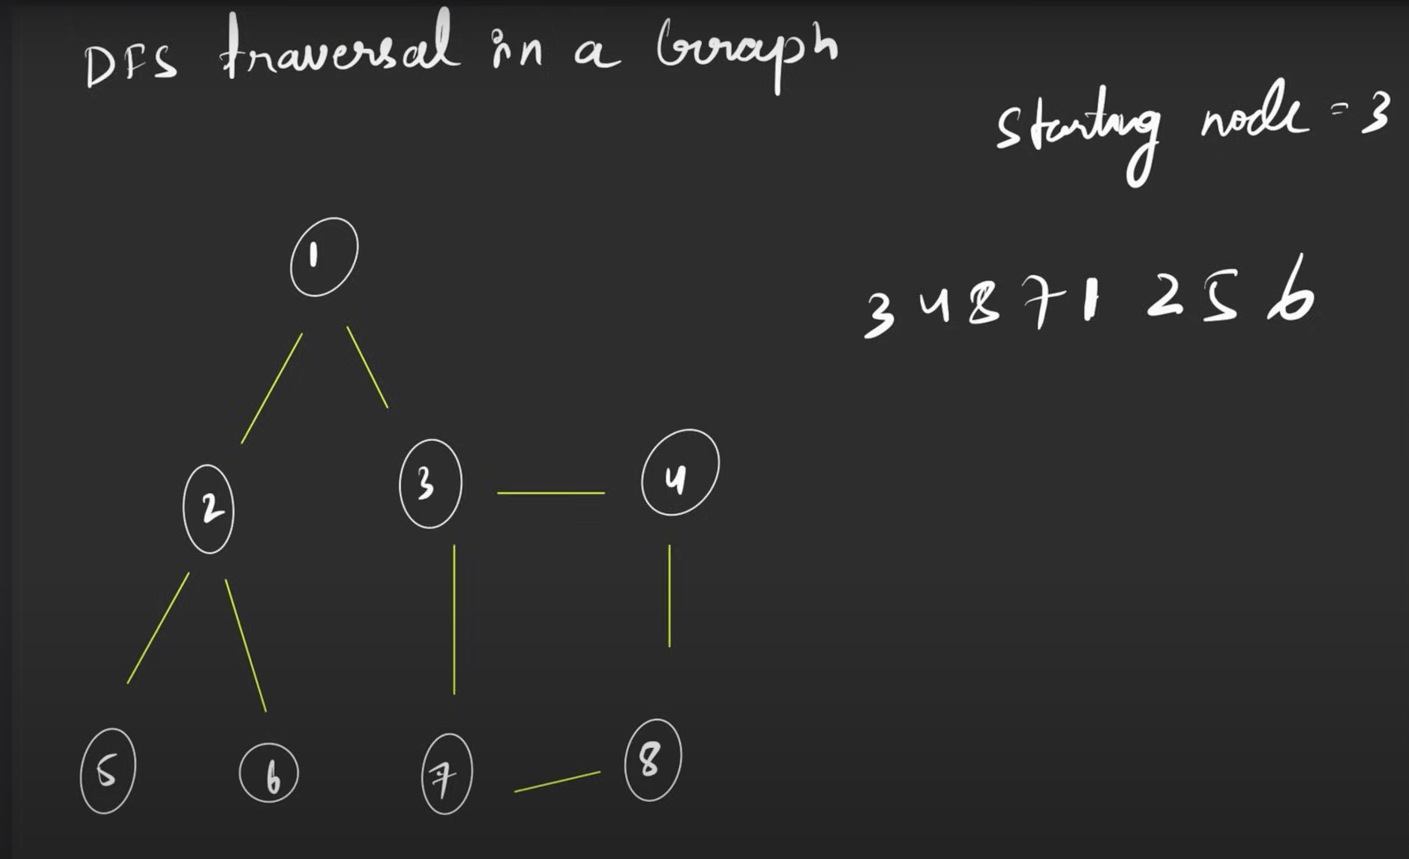

In [ ]:
# Depth First Search Traversal of Graph

class Solution:
    #Function to return a list containing the DFS traversal of the graph.
    def dfs(self,ele,adj,vis,lst):
        if vis[ele]:
            return 
        vis[ele]=1
        lst.append(ele)
        
        for node in adj[ele]: # function to visit all the neighbours of the current node
            if not vis[node]:
                self.dfs(node,adj,vis,lst)
    
    def DFS(self, adj):
        # code here
        vis=[0]*len(adj)
        lst=[]
        self.dfs(0,adj,vis,lst)
        return lst

In [ ]:
# Create adjacency list from the given graph

def adjacencyList(edges,v,isDirected):
    adj={x: [] for x in range(v)} 
    for i in range(len(edges)):
        u,v=edges[i]
        adj[u].append(v) 
        if not isDirected:
            adj[v].append(u) 
    return adj

## BFS/DFS Traversals

In [ ]:
# Oranges Rotting 
# Every sec all the fresh oranges adjacent to rotten oranges become rotten.
# Find the time taken for all oranges to rot. If not possible return -1.

from collections import deque
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        # create a visited array, a queue and a counter for fresh oranges
        n,m=len(grid),len(grid[0])
        vis=[[0]*m for _ in range(n)]
        q=deque([])
        cntFresh=0
        # iterate through the grid and add all rotten oranges to the queue and mark them as visited, also count no. of fresh oranges
        for i in range(n):
            for j in range(m):
                if grid[i][j]==2:
                    q.append((i,j,0)) # (row,col,time)
                    vis[i][j]=2
                elif grid[i][j]==1:
                    cntFresh+=1

        t=0
        cnt=0
        while q:  # apply bfs traversal as all non-rotten oranges equidistant from rotten oranges will rot at the same time
            row,col,tm=q.popleft()
            t=max(t,tm)
            dcol,drow=[0,1,0,-1],[1,0,-1,0] # delta row and column
            for i in range(4):
                nrow=row+drow[i]
                ncol=col+dcol[i]
                # if nrow and ncol are valid,nt visited and contain a fresh orange, add to queue and mark as visited
                if nrow>=0 and nrow<n and ncol>=0 and ncol<m and vis[nrow][ncol]==0 and grid[nrow][ncol]==1:
                    q.append((nrow,ncol,tm+1))
                    vis[nrow][ncol]=2
                    cnt+=1
        
        if cnt<cntFresh:
            return -1
        return t

In [ ]:
# Flood Fill
# The **Flood Fill** problem requires changing the color of a starting pixel and all its connected (4-directionally adjacent) pixels of the same initial color to a new given color.
# The transformation continues until no more adjacent pixels of the original color remain.
from collections import deque
class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, color: int) -> List[List[int]]:
        n,m=len(image),len(image[0])
        vis=[[0]*m for _ in range(n)]
        q=deque([(sr,sc)])
        vis[sr][sc]=1
        original_color=image[sr][sc]
        image[sr][sc]=color # change the color of the starting pixel to the new color

        while q: # use BFS traversal to change the color of all pixels equidistant from the starting pixel
            r,c=q.popleft()
            drow,dcol=[0,1,0,-1],[1,0,-1,0]
            for i in range(4):
                nrow=r+drow[i]
                ncol=c+dcol[i]
                # if nrow and ncol are valid, not visited and contain the original color, add to queue, mark as visited and change its color
                if nrow>=0 and nrow<n and ncol>=0 and ncol<m and vis[nrow][ncol]==0 and image[nrow][ncol]==original_color:
                    vis[nrow][ncol]=1
                    image[nrow][ncol]=color
                    q.append((nrow,ncol))

        return image

In [ ]:
# Detect Cycle in Undirected Graph - BFS

from collections import deque
class Solution:
    def isCycle(self, v, edges):
        def detect(adj, vis, src):
            q = deque([(src, -1)])
            vis[src] = 1
            while q:
                ele, parent = q.popleft()
                
                for node in adj[ele]:
                    if not vis[node]:
                        vis[node] = 1
                        q.append((node, ele))
                    elif parent != node:  # If the node is visited but it's not the parent, cycle detected
                        return True
            return False
        # Adjacency list
        adj = {x: [] for x in range(v)}
        for u, w in edges:  # Changed variable name to avoid conflict with `v`
            adj[u].append(w)
            adj[w].append(u)
        vis = [0] * v  # Visited array
        # For graph with multiple components
        for i in range(v):
            if not vis[i]:
                if detect(adj, vis, i):
                    return True
        return False
    
# Detect Cycle in Undirected Graph - DFS

class Solution:
    def isCycle(self, v, edges):
        def dfs(node,parent):
            vis[node]=1
            # use dfs appraoch, if element is visited and not a parent,then cycle is present
            for ele in adj[node]:
                if not vis[ele]:
                    if dfs(ele,node):
                        return True
                elif ele!=parent:
                    return True
            return False
        # adjacency list and visited array
        adj={x:[] for x in range(v)}
        for u,w in edges:
            adj[u].append(w)
            adj[w].append(u)
        vis=[0]*v
        # for a graph with multiple components
        for i in range(v):
            if not vis[i]:
                if dfs(i,-1):
                    return True
        return False

In [ ]:
# 0/1 Matrix - Search for 0s in a matrix and return the distance of the nearest 0 from each cell

from collections import deque
class Solution:
    def updateMatrix(self, mat: List[List[int]]) -> List[List[int]]:
        n,m=len(mat),len(mat[0])
        vis = [[0] * m for _ in range(n)]
        ans = [[0] * m for _ in range(n)]
        q=deque([])
        # store all zeroes in queue
        for i in range(n):
            for j in range(m):
                if mat[i][j]==0:
                    vis[i][j]=1
                    q.append((i,j,0))
        # perform multi source BFS on all zeroes and append all found 1's with their distance from closest zero
        while q:
            row,col,dist=q.popleft()
            ans[row][col]=dist
            delx,dely=[1,0,-1,0],[0,1,0,-1]
            for i in range(4):
                nrow=row+delx[i]
                ncol=col+dely[i]
                if nrow>=0 and nrow<n and ncol>=0 and ncol<m and vis[nrow][ncol]==0: # i.e exists, is a 1 , and not visited. we are searching for nearest 1's  from all zeroes as its the same as searching for nearest zero from all ones.
                    vis[nrow][ncol]=1
                    q.append((nrow,ncol,dist+1))
        return ans

In [ ]:
# Surrounded Regions - Convert 'O' to 'X' if they are completely surrounded by 'X' and not connected to the boundary of the matrix.

class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        n,m=len(board),len(board[0])
        vis=[[0]*m for _ in range(n)]
        # define DFS for matrix
        def dfs(srx,sry,num):
            if vis[srx][sry]:
                return
            board[srx][sry]=num
            vis[srx][sry]=1
            delx=[1,0,-1,0]
            dely=[0,1,0,-1]
            for i in range(4):
                nx=srx+delx[i]
                ny=sry+dely[i]
                if nx>=0 and nx<n and ny>=0 and ny<m and board[nx][ny]=='O':
                    dfs(nx,ny,num)

        # Visit all boundary zeroes and their neighbours and change them to 'T' using DFS
        for i in range(n):
            if board[i][0] == 'O':
                dfs(i, 0, 'T')
            if board[i][m-1] == 'O':
                dfs(i, m-1, 'T')
        for j in range(m):
            if board[0][j] == 'O':
                dfs(0, j, 'T')
            if board[n-1][j] == 'O':
                dfs(n-1, j, 'T')
        # now change remaining zeroes i.e which are not on boundary and their neighbours, as they form a closed region to 'X'
        for i in range(n):
            for j in range(m):
                if board[i][j]=='O':
                    board[i][j]='X'
        # Again visit all boundary zeroes and their neighbours and change them to 'O'
        for i in range(n):
            for j in range(m):
                if board[i][j]=='T':
                    board[i][j]='O'
        return board

In [ ]:
# Enclave Ones - Given a matrix of 0s and 1s, find the number of enclaves. An enclave is a region of 1s that is completely surrounded by 0s.
class Solution:
    def numEnclaves(self, grid: List[List[int]]) -> int:
        n,m=len(grid),len(grid[0])
        vis=[[0]*m for _ in range(n)]
        cnt=[0]
        def DFS(srx,sry):
            if vis[srx][sry]:
                return
            vis[srx][sry]=1
            cnt[0]+=1
            delx,dely=[1,0,-1,0],[0,1,0,-1]
            for i in range(4):
                nx=srx+delx[i]
                ny=sry+dely[i]
                if nx>=0 and nx<n and ny>=0 and ny<m and grid[nx][ny]==1 and vis[nx][ny]==0:
                    DFS(nx,ny)
        # count all 1's which are not completely enclosed i.e on the boundary and their neighbours using DFS
        for i in range(n):
            if grid[i][0]==1:
                DFS(i,0)
            if grid[i][m-1]==1:
                DFS(i,m-1)
        for j in range(m):
            if grid[0][j]==1:
                DFS(0,j)
            if grid[n-1][j]==1:
                DFS(n-1,j)
        # total no. of 1 cells which are completely enclosed = total cells - no. of 0 cells - no. of 1 cells which are directly/indirectly connected to the boundary 
        zeroes=0
        for i in range(n):
            for j in range(m):
                if grid[i][j]==0:
                    zeroes+=1
        return n*m-zeroes-cnt[0]

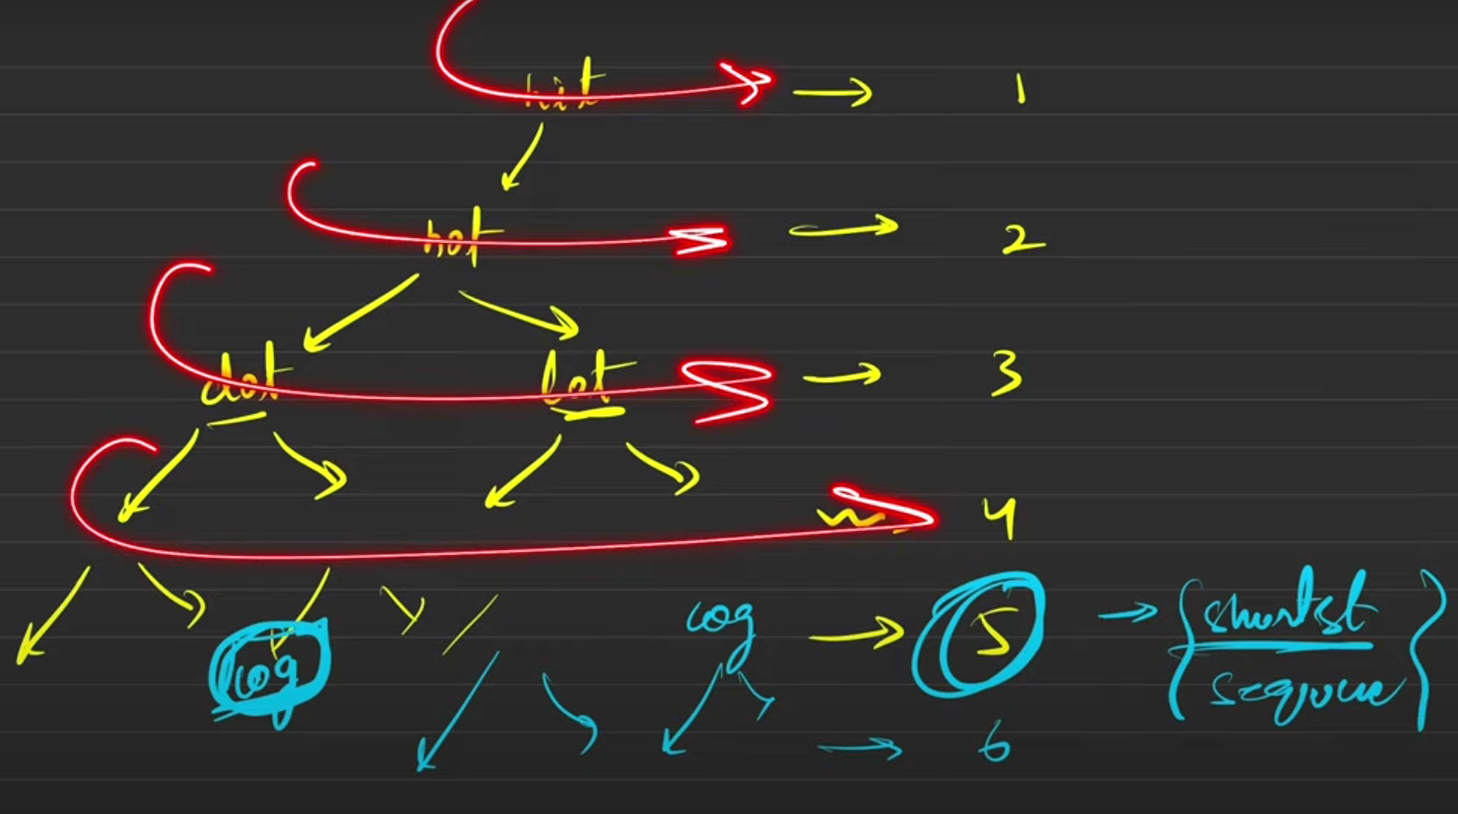

In [ ]:
# Word Ladder I - Shortest Path from word beginWord to endWord using BFS 

from collections import deque
class Solution:
    def ladderLength(self, beginWord: str, endWord: str, wordList: List[str]) -> int:
        q=deque([(beginWord,1)]) # queue of (word,steps)
        st=set(wordList)   # set to effectively search if a word is present in the wordlist
        if beginWord in st:  # after adding to the queue, remove it from the set (acts as visited array)
            st.remove(beginWord)
        while q:
            word,steps=q.popleft()
            if word==endWord:
                return steps
            for i in range(len(word)): # change every character of the word to all possible characters from a-z and check if it is in the wordList
                for c in range(ord('a'),ord('z')+1):
                    nword=word[:i]+chr(c)+word[i+1:]
                    if nword in st:  # if present in the wordlist, add to queue and remove from set
                        q.append((nword,steps+1))
                        st.remove(nword)
        return 0

# Word Ladder II - Shortest Path from word beginWord to endWord using BFS and return the path

In [ ]:
# No. of Distinct Islands

def distinctIsland(arr,n,m) :
    vis = [[0]*m for _ in range(n)]
    shapes = set()
    def DFS(srx, sry, basex, basey, shape):
        vis[srx][sry] = 1
        shape.append((srx - basex, sry - basey))  # Relative position of island to the base
        delx, dely = [1, 0, -1, 0], [0, 1, 0, -1]
        for i in range(4):
            nx = srx + delx[i]
            ny = sry + dely[i]
            if 0 <= nx < n and 0 <= ny < m and arr[nx][ny] == 1 and vis[nx][ny] == 0:
                DFS(nx, ny, basex, basey, shape)
    for i in range(n):
        for j in range(m):
            if arr[i][j] == 1 and vis[i][j] == 0:
                shape = []
                DFS(i, j, i, j, shape)
                shapes.add(tuple(shape))  # Use set to store unique shapes
    return len(shapes)

In [ ]:
# Bipartite Graph 
# if a graph can be colored using 2 colors such that no two adjacent nodes have the same color, or
# if we can divide the graph into two sets such that no two nodes in the same set are adjacent, or
# A graph is bipartite if the nodes can be partitioned into two independent sets A and B such that every edge in the graph connects a node in set A and a node in set B or
# a graph is bipartite if it does not contain an odd-length cycle.

class Solution:
    def isBipartite(self, graph: List[List[int]]) -> bool:
        n=len(graph)
        color=[-1]*n
        def DFS(ele,c):
            color[ele]=c # color the current node with color c
            for node in graph[ele]: # check all adjacent nodes
                if color[node]==-1: # if not colored, color it with opposite color and check if it is possible to color the graph with 2 colors
                    if not DFS(node,c^1):
                        return False
                elif color[node]==c:# if colored with same color, return false
                    return False
            return True
        for i in range(n): # check for all components
            if color[i]==-1:
                if not DFS(i,0):
                    return False
        return True 

## Topo Sort

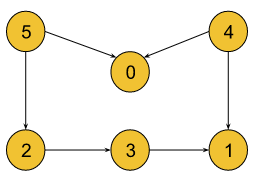

In [ ]:
# Topo Sort
# Topological Sort is a linear ordering of vertices such that for every directed edge u -> v, vertex u comes before v in the ordering.
# It is only possible to do a topological sort on a directed acyclic graph (DAG). Use stack to the topo sort order

from collections import deque
class Solution:
    def topoSort(self, v, edges):
        # Code here
        adj={x:[] for x in range(v)}
        for u,v in edges:
            adj[u].append(v)
        vis=[0]*v
        arr=[]
        def DFS(ele):
            vis[ele]=1
            for node in adj[ele]:
                if not vis[node]:
                    DFS(node)
            arr.append(ele)
        for i in range(v):
            if not vis[i]:
                DFS(i)
        return arr[::-1]

In [ ]:
# Topo Sort - Kahn's Algorithm -BFS. here topo stores the correct order of nodes. so t can be an array/queue.

from collections import deque
def topoSort(V, adj):
    indegree = [0] * V
    # Step 1: Compute indegree of each node
    for i in range(V):
        for neighbor in adj[i]:
            indegree[neighbor] += 1
    # Step 2: Push nodes with 0 indegree into queue
    q = deque()
    for i in range(V):
        if indegree[i] == 0:
            q.append(i)
    topo = []
    # Step 3: Kahn’s algorithm
    while q:
        node = q.popleft()
        topo.append(node)

        for neighbor in adj[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                q.append(neighbor)
    return topo

In [ ]:
# Find Eventual Safe State Nodes - i.e. nodes from which we can reach a terminal node (a node with no outgoing edges) in a directed graph.

from collections import deque
class Solution:
    def eventualSafeNodes(self, graph: List[List[int]]) -> List[int]:
        # reverse the direction of edges
        # apply kahn's algorithm, only those nodes which have some eventual outgoing edges will be left, and all safe state nodes will be visited.
        adj={x:[] for x in range(len(graph))}
        indegree=[0]*len(graph)
        for i in range(len(graph)):
            for node in graph[i]:
                adj[node].append(i)
                indegree[i]+=1
        q=deque([])
        for i in range(len(graph)):
            if indegree[i]==0:
                q.append(i)
        ans=[]
        while q:
            ele=q.popleft()
            ans.append(ele)
            for node in adj[ele]:
                indegree[node]-=1
                if indegree[node]==0:
                    q.append(node)
        return sorted(ans)

In [ ]:
# Alien Dictionary -> See Video 

from collections import deque
class Solution:
    def findOrder(self, words, N, K):
        # Create adjacency list and in-degree array
        adj = {chr(i + ord('a')): [] for i in range(K)}
        in_degree = {chr(i + ord('a')): 0 for i in range(K)}
        # Build the graph
        for i in range(N - 1):
            w1, w2 = words[i], words[i + 1]
            min_len = min(len(w1), len(w2))
            for j in range(min_len):
                if w1[j] != w2[j]:
                    adj[w1[j]].append(w2[j])
                    in_degree[w2[j]] += 1
                    break
        # Topological Sort (Kahn's Algorithm)
        q = deque()
        for ch in in_degree:
            if in_degree[ch] == 0:
                q.append(ch)
        order = []
        while q:
            ch = q.popleft()
            order.append(ch)
            for nei in adj[ch]:
                in_degree[nei] -= 1
                if in_degree[nei] == 0:
                    q.append(nei)
        # If order doesn't contain all K letters, cycle exists or incomplete
        if len(order) != K:
            return ""
        return ''.join(order)


## Shortest Paths 

In [ ]:
# Shortest Path from source to all vertices in a unit weight undirected graph. inf means cant reach the node.

from collections import deque
class Solution:
    def shortestPath(self, adj, src):
        # code here
        q=deque([(src,0)])
        arr=[float('inf')]*(len(adj)+1)
        arr[src]=0
        while q:
            ele,dist=q.popleft()
            for node in adj[ele]:
                if arr[node]==float('inf'):
                    arr[node]=dist+1
                    q.append((node,dist+1))

In [ ]:
# Shortest Path from source to all vertices in a weighted directed acyclic graph (DAG).

from collections import deque
class Solution:

    def shortestPath(self, v: int, E: int,
                     edges: List[List[int]]) -> List[int]:
        # use topo sort
        adj={x:[] for x in range(v)}
        indegree=[0]*v
        for edge in edges:
            adj[edge[0]].append((edge[1],edge[2]))
            indegree[edge[1]]+=1
        q=deque([])
        for i in range(v):
            if indegree[i]==0:
                q.append(i)
        topo=deque()
        while q:
            ele=q.popleft()
            topo.append(ele)
            for node,wt in adj[ele]:
                indegree[node]-=1
                if indegree[node]==0:
                    q.append(node)
        # in the topological order,caluclate dist of the adjacent node as min. of dist[adjnode] and dist[ele]+wt
        dist=[float('inf')]*v
        dist[0]=0
        while topo:
            ele=topo.popleft()
            for node,wt in adj[ele]:
                dist[node]=min(dist[node],dist[ele]+wt)
        return dist
            
        

In [ ]:
# Dijkstra's Algorithm - Shortest Path from source to all vertices in a weighted undirected graph.

class Solution:
    def dijkstra(v,graph,src):
        dist=[float('inf')]*v
        dist[src]=0
        st=set()
        st.add((0,src))
        while st:
            dist,node=min(st) # get the node with min distance from source
            st.remove((dist,node))
            for ele,edwt in graph[node]:
                if dist+edwt<dist[ele]:
                    # if someone had visited ele before. but current distance is shorter we can remove the previous entry from set.
                    st.discard((dist[ele],ele)) # discard removes only if present in set unlike remove
                    dist[ele]=dist+edwt
                    st.add((dist[ele],ele))
        return dist